In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import tensorflow as tf
import os
import time
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

print("Numpy version = ", np.__version__)
print("Tensorflow version = ", tf.__version__)
print("Sklearn version = ", skl.__version__)
print("Pandas version = ", pd.__version__)
print("Python version = ", __import__("platform").python_version())

warnings.filterwarnings('ignore')

Numpy version =  1.22.4
Tensorflow version =  2.9.1
Sklearn version =  1.1.1
Pandas version =  1.4.2
Python version =  3.8.10


In [2]:
def print_frequency(y_train,y_test,kind='Validation'):
    unique, counts = np.unique(y_train, return_counts=True)
    uniquet, countst = np.unique(y_test, return_counts=True)

    fig, ax = plt.subplots()
    rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
    rects2 = ax.bar(unique + 0.2, countst, 0.25, label=kind)
    ax.legend()
    ax.set_xticks(unique)
    ax.set_xticklabels(labels)

    plt.title('Fashion MNIST classes')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

def create_confusion_matrix (y_val, y_predict, score, vmax, model):
    cm = skl.metrics.confusion_matrix(y_val, y_predict)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square = True, cmap = 'Blues_r',vmin=0,vmax=vmax);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = model+'\n\nAccuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


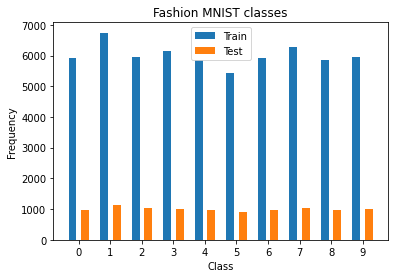

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

sprite = [
    {
        0: 'T-shirt',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    },
    {
        0: 'Zero',
        1: 'One',
        2: 'Two',
        3: 'Three',
        4: 'Four',
        5: 'Five',
        6: 'Six',
        7: 'Seven',
        8: 'Eight',
        9: 'Nine'
    }
]

labels = ["%s" % i for i in range(10)]

print_frequency(y_train,y_test,kind='Test')


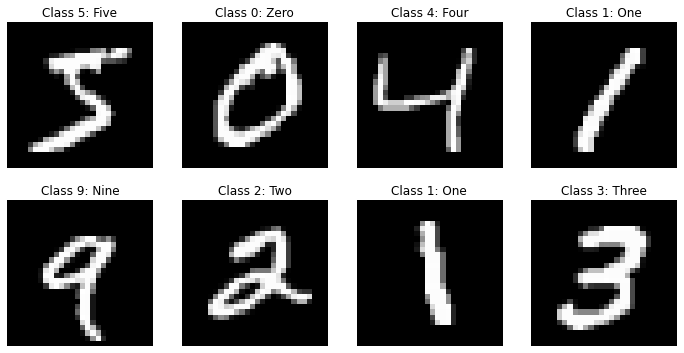

In [4]:
fig, ax = plt.subplots(2, 4, figsize = (12, 6))

for i in range(8):
    ax[i//4, i%4].imshow(x_train[i], cmap='gray')
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title("Class %d: %s" 
                            %(y_train[i],sprite[1][y_train[i]]))
    
plt.show()


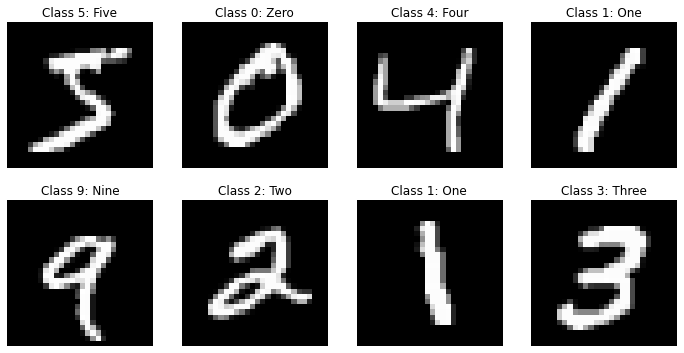

In [5]:
# Reduce the image size to its half 
x_train_reduced = np.array([img[::2, 1::2] for img in x_train])
x_test_reduced  = np.array([img[::2, 1::2] for img in x_test])

# Print the image with new size
fig, ax = plt.subplots(2, 4, figsize = (12, 6))

for i in range(8):
    ax[i//4, i%4].imshow(x_train[i], cmap='gray')
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title("Class %d: %s" 
                            %(y_train[i],sprite[1][y_train[i]]))
    
plt.show()

In [6]:
x_train_reduced = (x_train_reduced/255.0).astype('float32').reshape((60000,14*14))
x_test_reduced = (x_test_reduced/255.0).astype('float32').reshape((10000,14*14))

print(x_train_reduced.dtype)
print(x_test_reduced.dtype)

print("\nShape of X_train: ", x_train_reduced.shape)
print("Shape of X_test: ", x_test_reduced.shape)

print("\nMinimum value in X_train:", np.amin(x_train_reduced))
print("Maximum value in X_train:", np.amax(x_train_reduced))

print("\nMinimum value in X_test:", np.amin(x_test_reduced))
print("Maximum value in X_test:", np.amax(x_test_reduced))

float32
float32

Shape of X_train:  (60000, 196)
Shape of X_test:  (10000, 196)

Minimum value in X_train: 0.0
Maximum value in X_train: 1.0

Minimum value in X_test: 0.0
Maximum value in X_test: 1.0


## 1. Dataset preparation

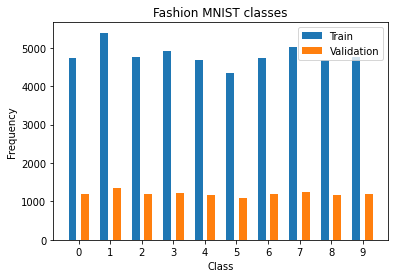

Shape of X_train:   (60000, 196)
Shape of y_train:   (60000,)
Shape of x_Dtrain:   (48000, 196)
Shape of y_Dtrain:  (48000,)
Shape of D_val:     (12000, 196)
Shape of y_Dval:    (12000,)
Proportion of classes in y_train:   [0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]

Proportion of classes in y_Dtrain:  [0.09870833 0.112375   0.09929167 0.1021875  0.097375   0.09035417
 0.098625   0.10441667 0.09752083 0.09914583]

Differences in proportions of classes in y_train and y_Dtrain:  [8.33333333e-06 8.33333333e-06 8.33333333e-06 4.16666667e-06
 8.33333333e-06 4.16666667e-06 8.33333333e-06 0.00000000e+00
 4.16666667e-06 4.16666667e-06]

Sum of proportions in y_train =  1.0000000000000002


In [7]:
N, d = x_train_reduced.shape
index = np.arange(N)

x_Dtrain,D_val,y_Dtrain,y_Dval,index_Dtrain,index_Dval = \
train_test_split(x_train_reduced,y_train,index,train_size=0.80,random_state=4,stratify=y_train)

print_frequency(y_Dtrain,y_Dval)

print("Shape of X_train:  ", x_train_reduced.shape)
print("Shape of y_train:  ", y_train.shape)
print("Shape of x_Dtrain:  ", x_Dtrain.shape)
print("Shape of y_Dtrain: ", y_Dtrain.shape)
print("Shape of D_val:    ", D_val.shape)
print("Shape of y_Dval:   ", y_Dval.shape)

u, c_y_train = np.unique(y_train, return_counts=True)
u, c_y_dtrain = np.unique(y_Dtrain, return_counts=True)
print("Proportion of classes in y_train:  ", c_y_train[0:10]/len(y_train))
print()
print("Proportion of classes in y_Dtrain: ", c_y_dtrain[0:10]/len(y_Dtrain))
print()
print("Differences in proportions of classes in y_train and y_Dtrain: ", 
      np.abs(c_y_train[0:10]/len(y_train) - c_y_dtrain[0:10]/len(y_Dtrain)))
print()
print("Sum of proportions in y_train = ", sum(c_y_train[0:10]/len(y_train)))

## 2. Choosing a baseline

### 2.1. Logistic Regression

In [8]:
# #Logistic Regression

# model_lgreg = LogisticRegression()
# solvers_lgreg = ['newton-cg']
# c_values_lgreg = [1.0] 
# grid_lgreg = dict(solver=solvers_lgreg,C=c_values_lgreg,random_state=[4])

# time_lgreg = time.time()
# grid_search_lgreg = GridSearchCV(estimator=model_lgreg, param_grid=grid_lgreg, scoring='accuracy',verbose=2, 
#             cv=skl.model_selection.StratifiedKFold(n_splits=2,random_state=4,shuffle=True).split(x_Dtrain,y_Dtrain))
# grid_result_lgreg = grid_search_lgreg.fit(x_Dtrain, y_Dtrain) 

# time_lgreg = time.time() - time_lgreg

# pd.DataFrame(grid_result_lgreg.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['rank_test_score'])